<a href="https://colab.research.google.com/github/sberniz/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/Santiago_Berniz_LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict? 

`BASE MSRP`

- [ ] Is your problem regression or classification? 

`'Regression'`

- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target. 

    `'it looks like normal distributionn'`

- [ ] Choose your evaluation metric(s).

`'r2score and mean absolute error'`

    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?


```
Will use mean square error and r2score
```


- [ ] Choose which observations you will use to train, validate, and test your model.
` Make,model,model year,range, and clean air elegibility`

    - Are some observations outliers? Will you exclude them? 

    `yes 0 and 845,000, will exclude them`

    - Will you do a random split or a time-based split?        
    
    ` randomtestsplit`

- [+ ] Begin to clean and explore your data.
- [ +] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/sberniz/build2/master/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/sberniz/build2/master/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

MessageError: ignored

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression
from scipy import stats
from category_encoders import OneHotEncoder, OrdinalEncoder
import plotly.express as px
from sklearn.preprocessing import StandardScaler


In [ ]:
electric_cars = pd.read_csv(DATA_PATH+'Electric_Vehicle_Population_Data.csv')
electric_cars.shape

(58383, 15)

In [ ]:
electric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58383 entries, 0 to 58382
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         58383 non-null  object 
 1   County                                             58382 non-null  object 
 2   City                                               58383 non-null  object 
 3   State                                              58383 non-null  object 
 4   ZIP Code                                           58383 non-null  int64  
 5   Model Year                                         58383 non-null  int64  
 6   Make                                               58383 non-null  object 
 7   Model                                              58383 non-null  object 
 8   Electric Vehicle Type                              58383 non-null  object 
 9   Clean 

In [ ]:
electric_cars.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,5YJ3E1EA9L,King,Auburn,WA,98001,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,47.0,4759478,POINT (-122.266685 47.308313)
1,1FADP3R47E,King,Seattle,WA,98103,2014,FORD,FOCUS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,76,29170,36.0,205611143,POINT (-122.343577 47.672491)
2,5YJSA1H1XE,King,Seattle,WA,98109,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,36.0,7424532,POINT (-122.346385 47.630685)
3,1N4BZ0CP9G,King,Seattle,WA,98103,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,36.0,252339384,POINT (-122.343577 47.672491)
4,WBY1Z2C56E,King,Bellevue,WA,98006,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,41350,41.0,213103376,POINT (-122.151342 47.560192)


In [ ]:
electric_cars['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            40596
Plug-in Hybrid Electric Vehicle (PHEV)    17787
Name: Electric Vehicle Type, dtype: int64

In [ ]:
electric_cars['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible    47945
Not eligible due to low battery range      10438
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [ ]:
electric_cars['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) #Basemodel if going with clasification weather is eligible or not

Clean Alternative Fuel Vehicle Eligible    0.821215
Not eligible due to low battery range      0.178785
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: float64

In [ ]:
electric_cars['Base MSRP'].mean() #Baseline if going to predict base msrp

37678.85351900382

In [ ]:
electric_cars

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,5YJ3E1EA9L,King,Auburn,WA,98001,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,47.0,4759478,POINT (-122.266685 47.308313)
1,1FADP3R47E,King,Seattle,WA,98103,2014,FORD,FOCUS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,76,29170,36.0,205611143,POINT (-122.343577 47.672491)
2,5YJSA1H1XE,King,Seattle,WA,98109,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,36.0,7424532,POINT (-122.346385 47.630685)
3,1N4BZ0CP9G,King,Seattle,WA,98103,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,36.0,252339384,POINT (-122.343577 47.672491)
4,WBY1Z2C56E,King,Bellevue,WA,98006,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,41350,41.0,213103376,POINT (-122.151342 47.560192)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58378,JN1AZ0CP4B,Pierce,Tacoma,WA,98409,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,29.0,214353912,POINT (-122.480106 47.211446)
58379,1N4AZ1CP0J,King,Seattle,WA,98119,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,29990,36.0,129767522,POINT (-122.36772100000002 47.639264)
58380,1N4AZ0CPXF,King,Seattle,WA,98115,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,46.0,142752711,POINT (-122.297534 47.685291)
58381,5YJSA1CG2D,King,Seattle,WA,98106,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,34.0,237945956,POINT (-122.35495400000002 47.537664)


In [ ]:
electric_cars['Base MSRP'].describe()

count     58383.000000
mean      37678.853519
std       19681.979238
min           0.000000
25%       29990.000000
50%       35000.000000
75%       39145.000000
max      845000.000000
Name: Base MSRP, dtype: float64

In [ ]:
electric_cars['Base MSRP'].describe().plot();

In [ ]:
electric_cars['Base MSRP'].plot(kind='density')

In [ ]:
electric_cars['Base MSRP'].plot(kind='hist')

In [ ]:
sns.distplot(electric_cars['Base MSRP'])

In [ ]:
electric_cars['Base MSRP'].plot.density() #mostly normal distribution with some outliers

In [ ]:
electric_cars['Base MSRP'].value_counts()

In [ ]:
electric_cars['Base MSRP'].isnull().sum()

In [ ]:
electric_cars['Electric Range'].value_counts()

In [ ]:
electric_cars[electric_cars['Model Year'] == 1993]

In [ ]:
electric_cars['Model Year'].value_counts()

In [ ]:
electric_cars['Base MSRP'].describe()

In [ ]:
#Convert 0 to NaNs for base msrp (No car with 0 values)
electric_cars['Base MSRP'] = electric_cars['Base MSRP'].replace()

In [ ]:
df1 = electric_cars.copy()

for i, item in enumerate(df1['Base MSRP']):
  if item > 200000:
    print (item)

In [ ]:
#######Interquartile range tst

stats.iqr(df1['Base MSRP'])

In [ ]:
df1 = electric_cars.copy()

for i, item in enumerate(df1['Base MSRP']):
  if item < 20000:
    print (item)

In [ ]:
#0 and 845,000 are outliers, will remove 
electric_cars['Base MSRP'] = electric_cars['Base MSRP'].replace({0:np.NaN,845000:np.NaN})
electric_cars.isnull().sum()

In [ ]:
stats.iqr(electric_cars['Base MSRP'])

In [ ]:
electric_cars.dropna(subset=['Base MSRP'], inplace=True )

In [ ]:
electric_cars

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(electric_cars,minimal=True).to_notebook_iframe()

In [ ]:
electric_cars['Base MSRP'].plot.density()

In [ ]:
sns.distplot(electric_cars['Base MSRP'])

In [ ]:
electric_cars['Make'].value_counts()

In [ ]:
electric_cars['Model'].value_counts()

In [ ]:
electric_cars['Model Year'].value_counts()

In [ ]:
#Will use make, model, and model year might add other features
#Will do a randomsplit test
def wrangle1split(df):
  X = df.copy()
  y = X['Base MSRP']
  X = X[['Model Year','Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Range']]
  X_train,X_val,y_train,y_val = train_test_split(X,y,train_size = 0.8, test_size=0.2,random_state=42)
  return X_train, X_val, y_train, y_val

In [ ]:
electric_cars.head(1)

In [ ]:
X_train ,X_val, y_train, y_val = wrangle1split(electric_cars)

In [ ]:
y_train.head()

In [ ]:
X_train.shape, X_val.shape

In [ ]:
X_train.head()

In [ ]:
X_val

In [ ]:
X_train.nunique()

In [ ]:
#model Linear regressor try
model2 = make_pipeline(OneHotEncoder(use_cat_names=True),
                       SimpleImputer(),
                       LinearRegression())
model2.fit(X_train,y_train)

In [ ]:
ylintrain = model2.predict(X_train)
ylinval = model2.predict(X_val)
mean_absolute_error(y_train,ylintrain),mean_absolute_error(y_val,ylinval)

In [ ]:
X_train.head()

In [ ]:
#ORdinal encoder try
modelord = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(),
                         RandomForestRegressor(random_state=42)
)
modelord.fit(X_train,y_train)

In [ ]:
modelord.score(X_train,y_train),modelord.score(X_val,y_val)

In [60]:
#First Model basic try other than baseline
model1 = make_pipeline(OneHotEncoder(use_cat_names=True),
                       SimpleImputer(),
                       RandomForestRegressor(random_state=42)
)
model1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Make', 'Model', 'Electric Vehicle Type',
                                     'Clean Alternative Fuel Vehicle (CAFV) '
                                     'Eligibility'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                   

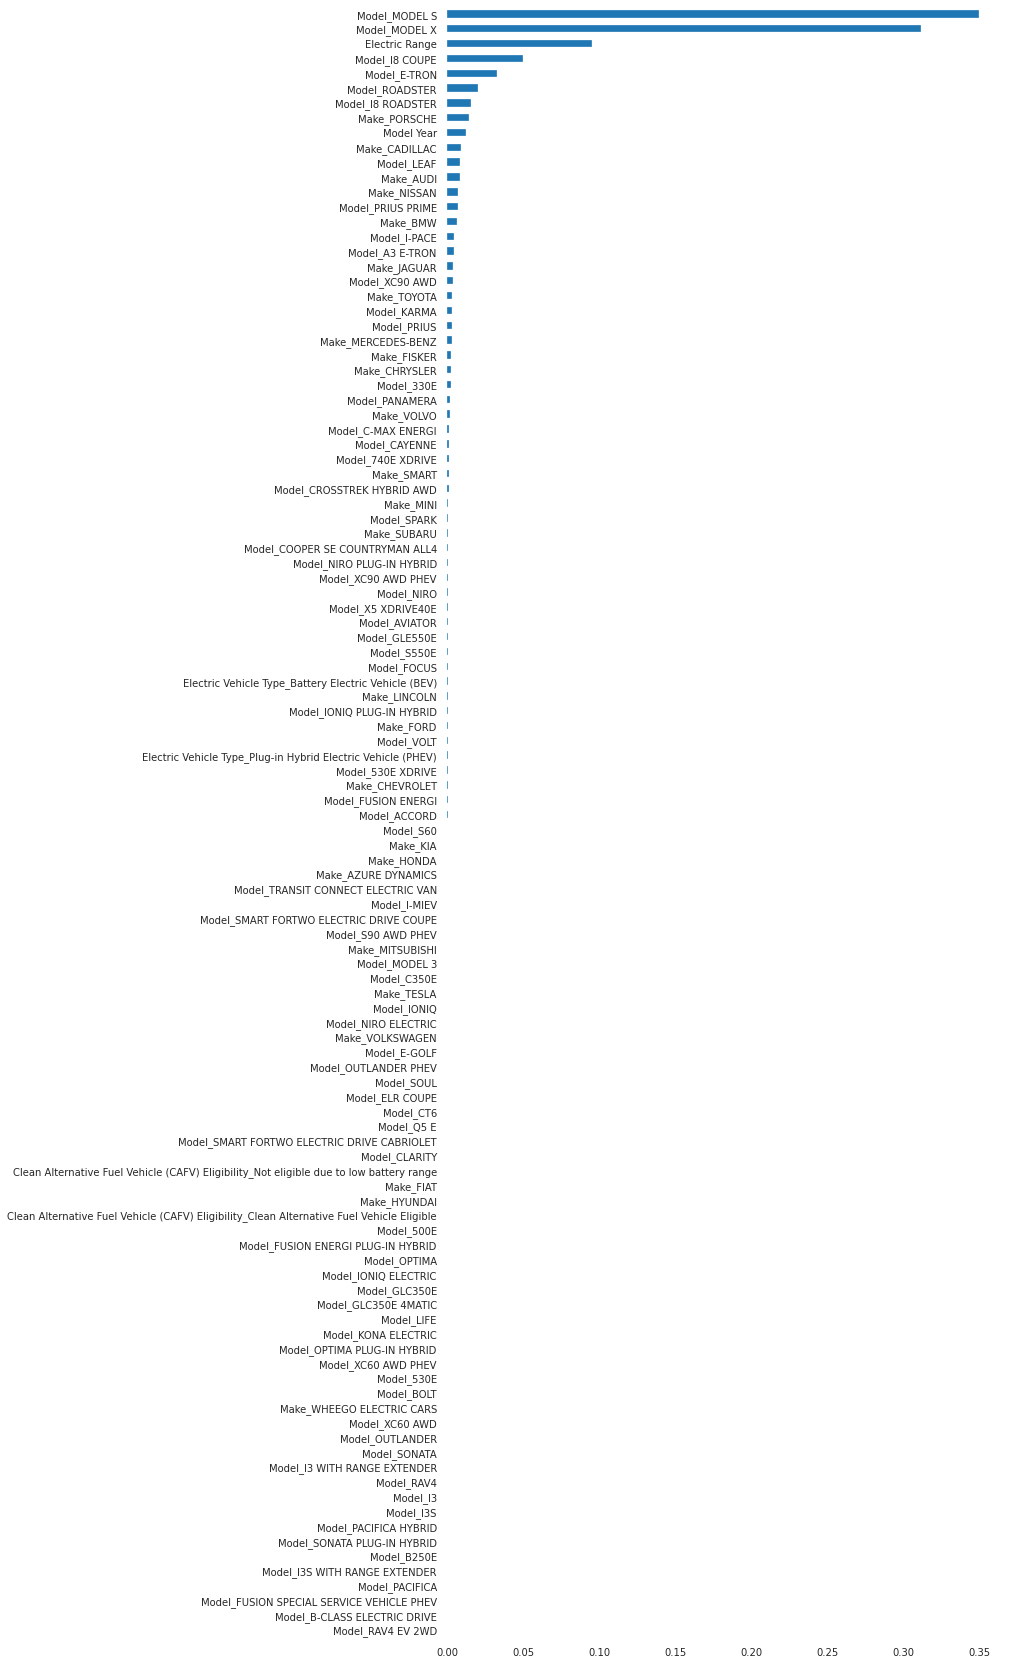

In [61]:
model = model1.named_steps['randomforestregressor']
encoder = model1.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_,encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()

In [62]:
print("Training Score:",model1.score(X_train,y_train))
print("Validation Score:",model1.score(X_val,y_val))

Training Score: 0.9999993024236821
Validation Score: 0.9999808478574651


In [63]:
print("Training Score:",model2.score(X_train,y_train))
print("Validation Score:",model2.score(X_val,y_val))

Training Score: 0.9842990262024721
Validation Score: 0.983719067345262


In [64]:
y_train_pred = model1.predict(X_train)
y_val_pred = model1.predict(X_val)

In [65]:
print("Training r2score:",r2_score(y_train,y_train_pred))
print("Val r2score",r2_score(y_val,y_val_pred))

Training r2score: 0.9999993024236821
Val r2score 0.9999808478574652


In [66]:
print("Training mean absolute error",mean_absolute_error(y_train,y_train_pred))
print("Validation mean absolute error",mean_absolute_error(y_val,y_val_pred))

Training mean absolute error 0.20206714729007644
Validation mean absolute error 0.8492254572601716


In [67]:
X_val.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
26408,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35
51890,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208
29817,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
27096,2012,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73
47373,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84


In [68]:
assert electric_cars.shape[0] == X_train.shape[0] + X_val.shape[0]

In [69]:
#BaseLine
guess = electric_cars['Base MSRP'].mean()
errors = guess - electric_cars['Base MSRP']
mean_absolute_error1 = errors.abs().mean()
mean_absolute_error1

12113.610279524992

In [70]:
#ROC AUC TRY WITH electric_cars electric vehicle type
electric_cars.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
1,1FADP3R47E,King,Seattle,WA,98103,2014,FORD,FOCUS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,76,29170.0,36.0,205611143,POINT (-122.343577 47.672491)
2,5YJSA1H1XE,King,Seattle,WA,98109,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900.0,36.0,7424532,POINT (-122.346385 47.630685)
3,1N4BZ0CP9G,King,Seattle,WA,98103,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010.0,36.0,252339384,POINT (-122.343577 47.672491)
4,WBY1Z2C56E,King,Bellevue,WA,98006,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,41350.0,41.0,213103376,POINT (-122.151342 47.560192)
5,1G1FW6S04J,Thurston,Olympia,WA,98501,2018,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,37495.0,22.0,152207093,POINT (-122.87404199999999 46.998873)


In [71]:
y_range = electric_cars['Electric Range']
X_range = electric_cars[['Model Year','Make','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Base MSRP']]

In [72]:
X_range.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP
1,2014,FORD,FOCUS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,29170.0
2,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,69900.0
3,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,29010.0
4,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,41350.0
5,2018,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,37495.0


In [73]:
electric_cars['Electric Range'].isnull().sum()

0

In [74]:
X_range_train,X_range_val,y_range_train,y_range_val = train_test_split(X_range,y_range,train_size=0.8,test_size=0.2,random_state=42)

In [75]:
assert X_range.shape[0] == X_range_train.shape[0] + X_range_val.shape[0]

In [76]:
modelrange = make_pipeline(OneHotEncoder(),
                           SimpleImputer(),
                           RandomForestClassifier(random_state=42)
                           )

modelrange.fit(X_range_train,y_range_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Make', 'Model', 'Electric Vehicle Type',
                                     'Clean Alternative Fuel Vehicle (CAFV) '
                                     'Eligibility'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease

In [77]:
modelrange.score(X_range_train,y_range_train)

0.9998833438323884

In [78]:
modelrange.score(X_range_val,y_range_val)

0.9997200447928332

In [79]:
electric_cars.head(1)

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
1,1FADP3R47E,King,Seattle,WA,98103,2014,FORD,FOCUS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,76,29170.0,36.0,205611143,POINT (-122.343577 47.672491)


###ROC AUC Try with Clean Alternative Fuel Vehicle(CAFV) Electric

In [ ]:
#Elecric vehicle type target and CLean alternative fuel vehicle elegibility target
electric_cars['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

In [ ]:
electric_cars['is_clean_eligible'] = electric_cars['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible'

In [ ]:
X_class = electric_cars[['Model Year','Make','Model','Electric Vehicle Type','Electric Range','Base MSRP']]
y_class = electric_cars['is_clean_eligible']

In [ ]:
X_class_train,X_class_val,y_class_train,y_class_val = train_test_split(X_class,y_class, test_size=0.2,train_size=0.8,stratify=y_class,random_state=42)

In [ ]:
#baseline
electric_cars['is_clean_eligible'].value_counts(normalize=True)

In [ ]:
log_model = make_pipeline(OneHotEncoder(),
                          SimpleImputer(),
                          LogisticRegression())
log_model.fit(X_class_train,y_class_train)

In [ ]:
log_model.score(X_class_train,y_class_train)

In [ ]:
log_model.score(X_class_val,y_class_val)

In [ ]:
y_pred = log_model.predict(X_class_val)

In [ ]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

In [ ]:

print(classification_report(y_class_val,y_pred))

In [ ]:
y_class_pred_prob = log_model.predict_proba(X_class_val)[:,-1]

In [ ]:
fpr,tpr,threshold = roc_curve(y_class_val,y_class_pred_prob)

df = pd.DataFrame({'FalsePositive Rate':fpr,'True Positive Rate':tpr,'Threshold':np.round(threshold,2)})

In [ ]:
df

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel("true pOsitive Rate")

In [ ]:
#Tree model
tree_model = make_pipeline(OneHotEncoder(use_cat_names=True),
                     SimpleImputer(),
                     DecisionTreeClassifier())

tree_model.fit(X_class_train,y_class_train)


In [ ]:
y_class_pred_prob_tree = tree_model.predict_proba(X_class_val)[:,-1]
fpr2,tpr2,threshold2 = roc_curve(y_class_val,y_class_pred_prob_tree)

In [ ]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Decision Tree')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [ ]:
print('logistic', roc_auc_score(y_class_val, y_class_pred_prob))
print('tree', roc_auc_score(y_class_val, y_class_pred_prob_tree))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
y_class_pred_tree = tree_model.predict(X_class_val)

In [ ]:
accuracy_score(y_class_val,y_class_pred_tree)

In [ ]:
def matrix(y_true,y_pred):
  data = confusion_matrix(y_true,y_pred)
  Index = ['Actual 0','Actual 1']
  columns = ['Predicted 0', 'Predicted 1']
  return pd.DataFrame(data,Index,columns)

In [ ]:
matrix(y_class_val,y_class_pred_tree)

In [ ]:
plt.bar(electric_cars['Model'],electric_cars['Base MSRP'])
plt.xticks(rotation='vertical');

In [ ]:
import plotly.express as px

In [ ]:
figure = px.bar(electric_cars,x='Model',y='Base MSRP')
figure.show()

In [ ]:
#Function for app 

model_year = []

for year in electric_cars['Model Year']:
  model_year.append(year)

In [ ]:
model_year

###LS_233_Assignment

In [ ]:
#XGBOOST TRY
from xgboost import XGBRegressor

In [ ]:
modelxg1 = make_pipeline(OrdinalEncoder(),
                         XGBRegressor(n_estimators=100,random_state=42))
modelxg1.fit(X_train,y_train)

In [ ]:
print("Training accuracy:",modelxg1.score(X_train,y_train))
print("Validation accuracy:",modelxg1.score(X_val,y_val))

In [ ]:
#GRadient boosting
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
modelgb = make_pipeline(OrdinalEncoder(),
                        SimpleImputer(strategy='median'),
                        GradientBoostingRegressor())
modelgb.fit(X_train,y_train)

In [ ]:
print("Training accuracy:",modelgb.score(X_train,y_train))
print("Validation accuracy:",modelgb.score(X_val,y_val))

In [ ]:
#Drop Column importance
column = 'Model'
modeldc = make_pipeline(OrdinalEncoder(),
                        SimpleImputer(strategy='median'),
                        RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
)

modeldc.fit(X_train.drop(columns=column), y_train)
score_without = modeldc.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

###Permutation Importances

In [116]:
#Manual
feature = 'Model'
X_val['Model'].head()

26408       VOLT
51890    MODEL S
29817       LEAF
27096       LEAF
47373       LEAF
Name: Model, dtype: object

In [117]:
X_val['Model'].value_counts()

LEAF                            2185
MODEL 3                         2049
MODEL S                         1104
VOLT                             943
BOLT                             535
                                ... 
500                                1
IONIQ ELECTRIC                     1
RAV4 EV 2WD                        1
TRANSIT CONNECT ELECTRIC VAN       1
AVIATOR                            1
Name: Model, Length: 75, dtype: int64

In [118]:
X_val_shuffled = X_val.copy()

In [119]:
X_val_shuffled[feature] = np.random.permutation(X_val[feature])

In [120]:
X_val_shuffled[feature].head()

26408    MODEL S
51890    MODEL 3
29817    MODEL X
27096    MODEL S
47373       LEAF
Name: Model, dtype: object

In [121]:
score_with = pipeline.score(X_val,y_val)
score_permuted =pipeline.score(X_val_shuffled,y_val)
print(f'Validation accuracy with{feature}:{score_with}')
print(f'Validation accuracy with{feature} permuted:{score_permuted}')
print(f'Permutation importance:{score_with -score_permuted}')

Validation accuracy withModel:1.0
Validation accuracy withModel permuted:0.8345464725643897
Permutation importance:0.16545352743561026


In [122]:
#Permutation importance sklearn
from sklearn.inspection import  permutation_importance

In [123]:
result = permutation_importance(pipeline,X_val,y_val,n_repeats=5,random_state=0)

In [124]:
df = pd.DataFrame({'feature':X_val.columns,
                   'importances_mean':np.round(result['importances_mean'],3),
                   'importances_std':result['importances_std']})

In [125]:
df

,feature,importances_mean,importances_std
0,Model Year,0.512,0.003149
1,Make,0.141,0.002487
2,Model,0.168,0.000900
3,Electric Vehicle Type,0.004,0.000506
4,Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000,0.000059
5,Electric Range,0.416,0.002203


In [126]:
#With eli5
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 2.7MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


In [127]:
transformers = make_pipeline(OrdinalEncoder(),
                             SimpleImputer(strategy='median'))
X_train_tranformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

modelt = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
modelt.fit(X_train_tranformed,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [128]:
y_val

26408    39145.0
51890    69900.0
29817    29010.0
27096    35200.0
47373    29010.0
          ...   
49458    74500.0
28891    69900.0
22704    82500.0
16973    33120.0
10947    33400.0
Name: Base MSRP, Length: 10716, dtype: float64

In [129]:
permuter = PermutationImportance(
    modelt,
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_transformed,y_val)


PermutationImportance(cv='prefit',
                      estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100

In [130]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
1.4693 ± 0.0519,Model
1.3968 ± 0.0647,Electric Range
0.1239 ± 0.0272,Model Year
0.1186 ± 0.0071,Make
0.0514 ± 0.0019,Electric Vehicle Type
0.0002 ± 0.0000,Clean Alternative Fuel Vehicle (CAFV) Eligibility


In [131]:
#early stopping iterations try
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

modeltb = XGBRegressor(
    n_estimators = 1000,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

modeltb.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='rmse', 
          early_stopping_rounds=50) # Stop if the score hasn't improved in 50 rounds

[20:55:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:22367.7	validation_1-rmse:22455.6
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:11571.4	validation_1-rmse:11550.5
[2]	validation_0-rmse:6203.78	validation_1-rmse:6120.05
[3]	validation_0-rmse:3316.1	validation_1-rmse:3266.97
[4]	validation_0-rmse:1958.84	validation_1-rmse:1921.46
[5]	validation_0-rmse:1430.6	validation_1-rmse:1426.81
[6]	validation_0-rmse:1086.6	validation_1-rmse:1079.59
[7]	validation_0-rmse:906.826	validation_1-rmse:906.187
[8]	validation_0-rmse:656.831	validation_1-rmse:656.978
[9]	validation_0-rmse:491.488	validation_1-rmse:532.528
[10]	validation_0-rmse:308.907	validation_1-rmse:335.95
[11]	validation_0-rmse:281.27	validation_1-rmse:307.16
[12]	validation_0-rmse:198.107	validation_1-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [132]:
modeltb.score(X_val_encoded,y_val)

0.9999999723313745


###LS_234 Assignment

In [155]:

#Partial Dependent Plot
model4 = make_pipeline(
    OneHotEncoder(),
    XGBRegressor(n_estimators=200,objective='reg:squarederror',n_jobs=-1)
    
)
model4.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Make', 'Model', 'Electric Vehicle Type',
                                     'Clean Alternative Fuel Vehicle (CAFV) '
                                     'Eligibility'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=200, n_jobs=-1,
                              nthread=None, objective='reg:squarede

In [157]:
model4.score(X_val,y_val)

0.994347778994148

In [197]:
!pip install pdp

  Created wheel for pdp: filename=pdp-0.3.0-cp36-none-any.whl size=6603 sha256=d087793862d58c2536197af3bf2e7075c53c179e5207751673e27d2ad5655e4d
  Stored in directory: /root/.cache/pip/wheels/84/fb/5e/afb783110614b3c1a4187e6f83e4f4ea0088fbdb82921013a2
Successfully built pdp


In [138]:
!pip install pdpbox


     |████████████████████████████████| 57.7MB 71kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=0ce76bad518f7c90c75ddf6896aa7a27eb7189b9937fb10dc2b8190334290ce2
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [152]:
plt.rcParams['figure.dpi'] = 72

In [158]:
from pdpbox.pdp import pdp_isolate,pdp_plot

In [167]:
feature = 'Electric Range'
isolated = pdp_isolate(
    model=model4,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

In [163]:
X_val.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
26408,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35
51890,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208
29817,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
27096,2012,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73
47373,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84


(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd526d31710>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd526d1b7b8>})

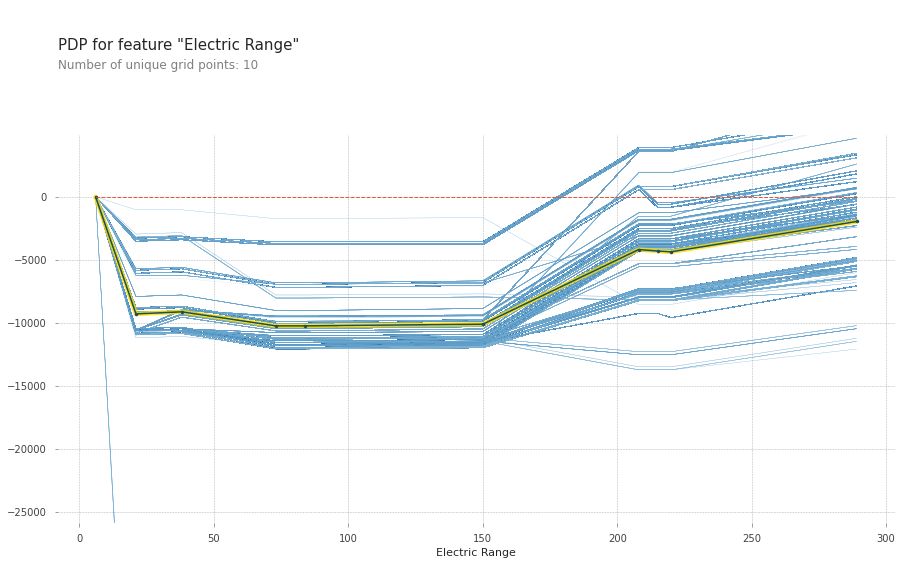

In [168]:
pdp_plot(isolated,feature_name=feature,plot_lines=True)

In [169]:
#Partial dependence with two features
from pdpbox.pdp import pdp_interact,pdp_interact_plot

In [173]:
features=['Model Year','Electric Range']
interaction = pdp_interact(
    model=model4,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

Text(0, 0.5, 'Electric Range')

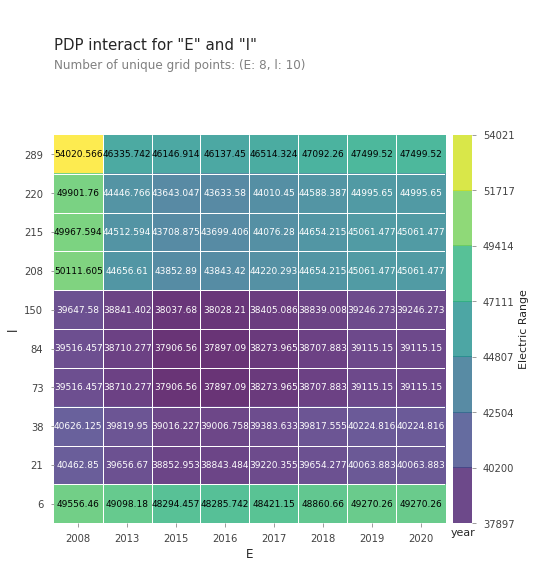

In [176]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)
plt.xlabel("year")
plt.ylabel("Electric Range")

In [180]:
#3d plotly try
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)[::-1]

In [183]:
pdp.tail()

Model Year,2008.0,2013.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Electric Range,,,,,,,,
84.0,39516.457031,38710.277344,37906.558594,37897.089844,38273.964844,38707.882812,39115.148438,39115.148438
73.0,39516.457031,38710.277344,37906.558594,37897.089844,38273.964844,38707.882812,39115.148438,39115.148438
38.0,40626.125000,39819.949219,39016.226562,39006.757812,39383.632812,39817.554688,40224.816406,40224.816406
21.0,40462.851562,39656.671875,38852.953125,38843.484375,39220.355469,39654.277344,40063.882812,40063.882812
6.0,49556.460938,49098.179688,48294.457031,48285.742188,48421.148438,48860.660156,49270.261719,49270.261719


In [186]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title='price')
    )
)

fig = go.Figure(surface, layout)
fig.show()

In [187]:
X_val.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
26408,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35
51890,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208
29817,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
27096,2012,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73
47373,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84


In [223]:
#With categorical features pdp
#use ordinal encoder outside pipeline
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model5 = RandomForestRegressor(random_state=42)
model5.fit(X_train_encoded,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [220]:
ypred= model5.predict(X_val_encoded)
r2_score(ypred,y_val)

0.9999808471130429

In [206]:
from pdpbox import pdp


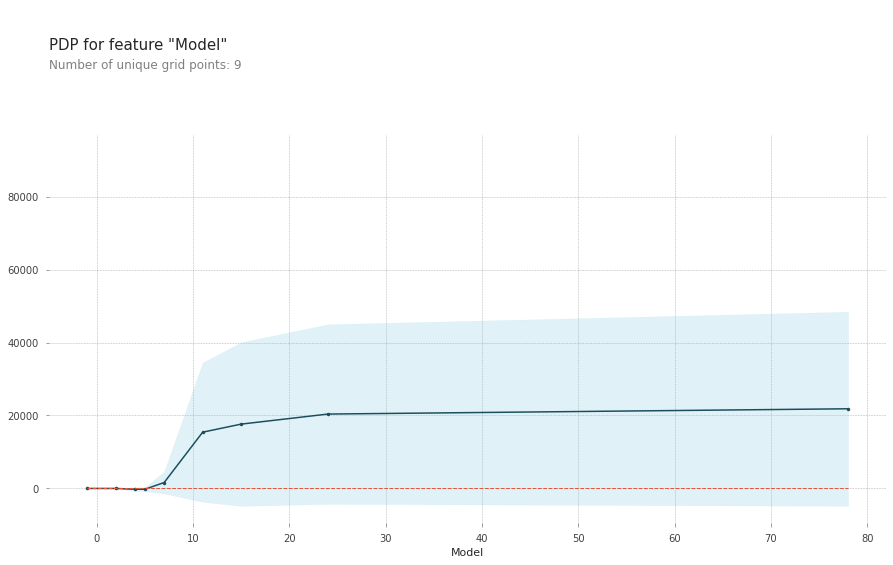

In [224]:
feature='Model'
pdp_dist= pdp_isolate(
    model=model5,
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns,
    feature=feature
)
pdp.pdp_plot(pdp_dist, feature);

In [226]:
encoder.mapping[1]

{'col': 'Model', 'data_type': dtype('O'), 'mapping': VOLT               1
 BOLT               2
 500E               3
 LEAF               4
 MODEL 3            5
                   ..
 AVIATOR           75
 IONIQ             76
 RAV4 EV 2WD       77
 IONIQ ELECTRIC    78
 NaN               -2
 Length: 79, dtype: int64}

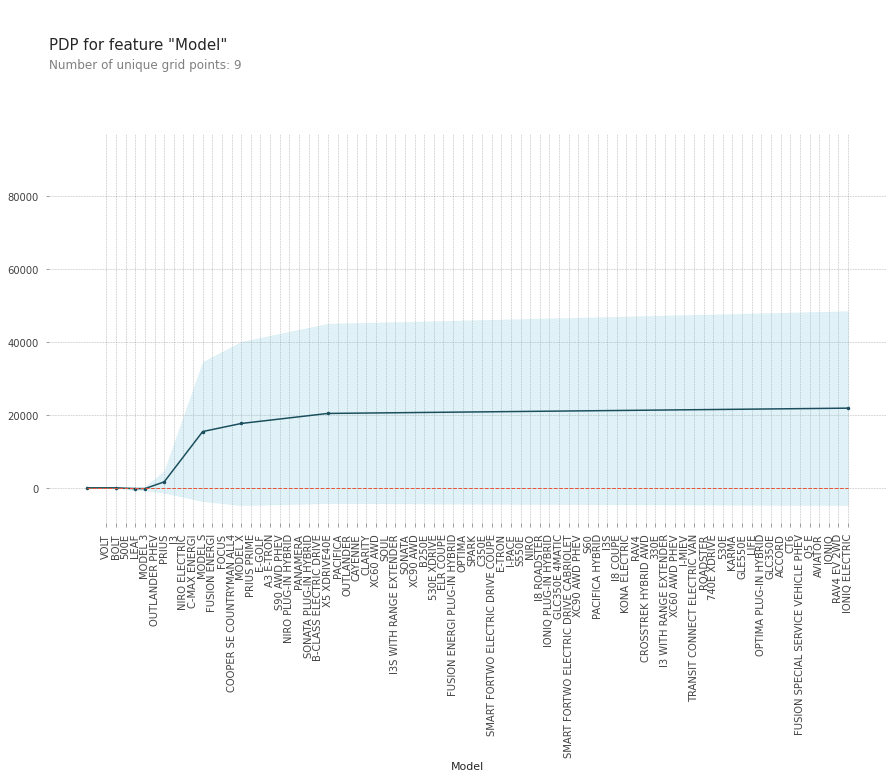

In [233]:
feature='Model'
for item in encoder.mapping:
  if item['col'] == feature:
    feature_mapping = item['mapping']
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names= feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()
pdp.pdp_plot(pdp_dist,feature)
plt.xticks(category_codes,category_names,rotation='vertical');

In [247]:
X_val_encoded

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
26408,2012,1,1.0,1,1,35
51890,2014,4,11.0,2,1,208
29817,2016,3,4.0,2,1,84
27096,2012,3,4.0,2,1,73
47373,2016,3,4.0,2,1,84
...,...,...,...,...,...,...
49458,2018,4,11.0,2,1,249
28891,2014,4,11.0,2,1,208
22704,2017,4,15.0,2,1,200
16973,2017,9,12.0,1,2,21


(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd4dfae2828>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd4e074ef28>})

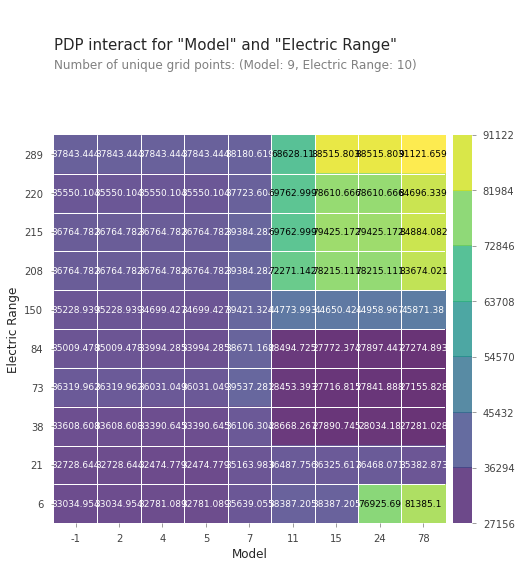

In [257]:
features1 = ['Model','Electric Range']
interaction2 = pdp_interact(
    model = model5,
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns,
    features=features1
)
pdp_interact_plot(interaction2,plot_type='grid', feature_names=features1)

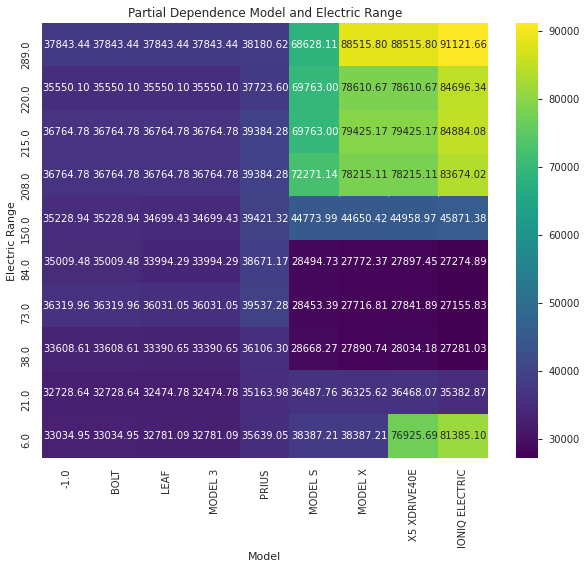

In [260]:
pdp = interaction2.pdp.pivot_table(
    values='preds', 
    columns=features1[0], # First feature on x axis
    index=features1[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending
pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence Model and Electric Range');


In [271]:
X_val_encoded.head(1)

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
26408,2012,1,1.0,1,1,35


In [272]:
features2 = ['Make','Model','Electric Range','Electric Vehicle Type']

In [273]:
row = X_val_encoded.iloc[[0]]
row

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
26408,2012,1,1.0,1,1,35


In [274]:
y_val.iloc[[0]]

26408    39145.0
Name: Base MSRP, dtype: float64

In [279]:
model5.predict(row)

array([39145.])

In [277]:
!pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394130 sha256=2d7f7bdb5d32dd81012cb881cd42cd9b3449ab2c68500c9571f6243263f48c59
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [294]:
processor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer()
)

In [295]:
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

In [296]:
model7 = RandomForestRegressor(random_state=42)

In [297]:
model7.fit(X_train_processed,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [300]:
row = X_val.iloc[[0]]
row

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
26408,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35


In [290]:
ypred7 = model7.predict(X_val_processed)
r2_score(ypred7,y_val)

0.9997811882968529

In [301]:
#SHAPLEY VALUES
import shap

In [303]:
explainer = shap.TreeExplainer(model7)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)